# Credit Risk Analysis

## 1 - Research & Data Exploration

## Overview

***Objective***: The data used in this project is related to simulating credit bureau data. The aim of the project is to build and evaluate a classification model to predict whether an individual will default on their loan (y). In other words, whether or not they will make their re-payments on time. 

## Dataset Source

_The Dataset used for this analysis is obtained from the Kaggle (https://www.kaggle.com/) website. Details about the dataset can be found here:_***https://www.kaggle.com/datasets/laotse/credit-risk-dataset/code***

Dataset was accessed on: **31/10/2022**

**Why was the dataset choosen?**

## Exploratory Data Analysis

### <font color='green'>Load and Explore the Data</font>

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [2]:
# Use Pandas' .read_csv() function to load the dataset into a Pandas DataFrame and store it in a variable
credit = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Print the number of rows and columns in the DataFrame
print(f'The dataset contains: {credit.shape[0]} observations and {credit.shape[1]} features.')

The dataset contains: 32581 observations and 12 features.


In [4]:
# Save the features into a variable called 'columns' for easy access later on
columns = credit.columns
# Inspect features
columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
# Number of unique values present in each column
def get_unique_values(columns):
    for i in columns:
        print(i, '\t', len(credit[i].unique()))

get_unique_values(columns)

person_age 	 58
person_income 	 4295
person_home_ownership 	 4
person_emp_length 	 37
loan_intent 	 6
loan_grade 	 7
loan_amnt 	 753
loan_int_rate 	 349
loan_status 	 2
loan_percent_income 	 77
cb_person_default_on_file 	 2
cb_person_cred_hist_length 	 29


In [6]:
# Inspect the first five rows of the dataset
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<font color='green'>Checking the number of unique values in each column, as well as inspecting the first few rows of the DataFrame can give an initial feel to what kind of data is present in the dataset and how the data is structured. It can be assumed that the credit data contains both numerical and categorical variables</font>

In [7]:
# Inspect data types and check for missing values in the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<div class='alert alert-block alert-info'><u>Note:</u> Data types suggest a mixture of numeric and categorical features are present in the dataset!</div>

<div class='alert alert-block alert-info'><u>Note:</u> Varying column lengths suggest missing data is present in some of the columns!</div>

<font color='green'>The **.info()** function proves the initial assumption about the data types (***numerical*** - int and float, ***categorical*** - object (string)). Furthermore, the count of Non-Null differ for some of the features which means there are missing values in the dataset</font>

In [8]:
# Ratio of missing values in the data set
# Save the % of missing values for each feature in a Pandas Series in a descending order
credit_missing = pd.Series(data=[round(credit[i].isnull().sum() / len(credit) * 100, 2) for i in columns], index=columns)
credit_missing.sort_values(ascending=False)

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

<font color='green'> **Columns: 'loan_int_rate' and 'person_emp_length' contain missing values**. The proportion of missing values is relatively small in the employment length variable and slightly higher for the interest rate. Missing values will be handled at the _pre-processing stage_ before fitting the data to any Machine Learning model

### <font color='green'>Class Distribution</font>

The target feature in the dataset that we are trying to predict: **loan_status**
The status of the loan is represented as a binary variable where:
> * **0** (False) &rarr; **Non-Default** (Loan re-payment successful)
> * **1** (True) &rarr; **Default** (Loan re-payment failed)

In [9]:
# Create a copy of the dataset for visualization
credit_copy = credit.copy()

# Change the values of the target variable to allow easier interpretation
credit_copy['loan_status'] = credit_copy['loan_status'].apply(lambda x: 'Default' if x == 1 else 'Non-Default')

<font color='green'>The data type of the target feature by default is ***int (1 or 0)***, to provide a better interpretation when exploring class distribution, ***values are transformed to String values (Default or Non-Default)*** using a lambda function</font>

In [10]:
credit_copy['loan_status'].describe()

count           32581
unique              2
top       Non-Default
freq            25473
Name: loan_status, dtype: object

In [11]:
# Output the value counts for the target feature
credit_copy['loan_status'].value_counts()

Non-Default    25473
Default         7108
Name: loan_status, dtype: int64

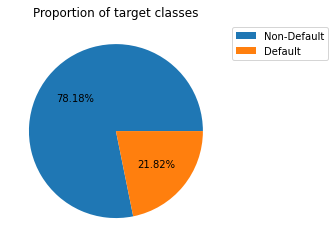

In [12]:
# Visualize class distribution proportions on a pie chart
def pie_visualize_distribution(target_feature, title):
    labels = credit_copy[target_feature].value_counts().index.tolist() # Extract the labels for plot legend
    
    # Create the pie chart with proprtion of values shown on chart
    plt.pie(credit_copy[target_feature].value_counts(), autopct=lambda x: f'{round(x, 2)}%')
    plt.title(title) # Set the tile for the plot
    # Create a legend with labels in the upper right corner
    plt.legend(labels, bbox_to_anchor=(1.5, 1), loc='upper right')
    plt.show() # Output the chart

pie_visualize_distribution('loan_status', 'Proportion of target classes')

<div class='alert alert-block alert-info'> <u>Note:</u> The proportion for target variable classes suggests a mildly imbalanced dataset!</div>

<font color='green'>The chart shows an **unequal distribution** among target classes. Training a Machine Learning model with imbalanced data can lead to the model being **biased** towards the negative class, and perform worse </font>

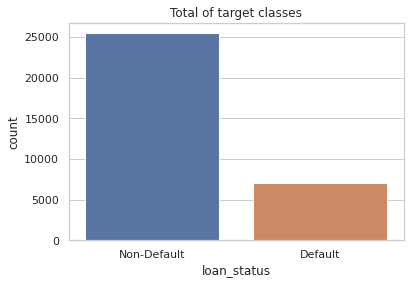

In [13]:
# Visualize total number for each class on a count plot
def count_visualize_distribution(target_feature, title):
    sns.set_theme(style='whitegrid')
    # Create the countplot for the target feature in the DataFrame
    sns.countplot(credit_copy, x=credit_copy[target_feature], 
                  order=credit_copy[target_feature].value_counts().index.tolist())
    plt.title(title) # Set the title for the plot
    plt.show() # Output the chart

count_visualize_distribution('loan_status', 'Total of target classes')

<font color='green'>The chart above shows the same unequality in class distribution but also shows the number of times each class appears in the dataset</font>

In [14]:
credit.groupby('loan_status').mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,0.246889,5.685003


<font color='green'>People who have a lower income (person_income), their loan amount would take a higer proportion of said income (loan_percent_income) are more likely to fail their loan re-payments. This would also suggest a **high correlation** between these variables</font>

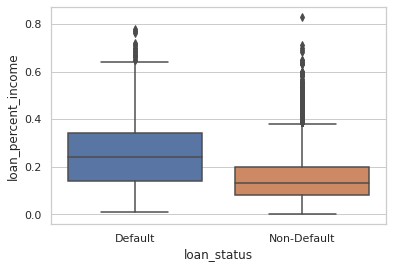

In [15]:
# Visualize the distribution of target classes based on the 'loan_percent_income' variable
def visualize_based_on(target_feature, based_on):
    sns.boxplot(credit_copy, x=credit_copy[target_feature], y=credit_copy[based_on])
    # plt.xlabel('Loan Status')
    # plt.ylabel('Loan % Income')
    plt.show()

visualize_based_on('loan_status', 'loan_percent_income')
# Note: Function allows for visualizing the distribution of target classes based on other predictor variable by
# by changing the 'based_on' parameter

<div class='alert alert-block alert-info'> <u>Note:</u> Boxplot detected outliers in the dataset!</div>

<font color='green'>The boxplot confirms the assumption made in the previous cell. Also some **outliers** are shown on the boxplot. These will be handled in the pre-processing stage</font>

### <font color='green'>Quantitative Variables</font>

In [16]:
# Select quantitative features only and save the column names into a variable 
credit_num_cols = credit.select_dtypes(include=['number']).columns
credit_num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
# Check the proportion of quantitative features in the dataset
round(len(credit_num_cols) / len(credit.columns) * 100, 1)

66.7

<font color='green'>2/3 of the variables in the dataset are **numerical**</font>

In [18]:
# Display summary statistics for the Quantitative variables in the DataFrame using .describe()
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<div class='alert alert-block alert-info'> <u>Note:</u> Potential outliers for the age, income and employment length columns, which will be further investigated and dealt with if necessary at the pre-processing stage</div>

<font color='green'>The **difference between the 75% quantile and the max value** for some variables suggest the presence of **outliers**</font>

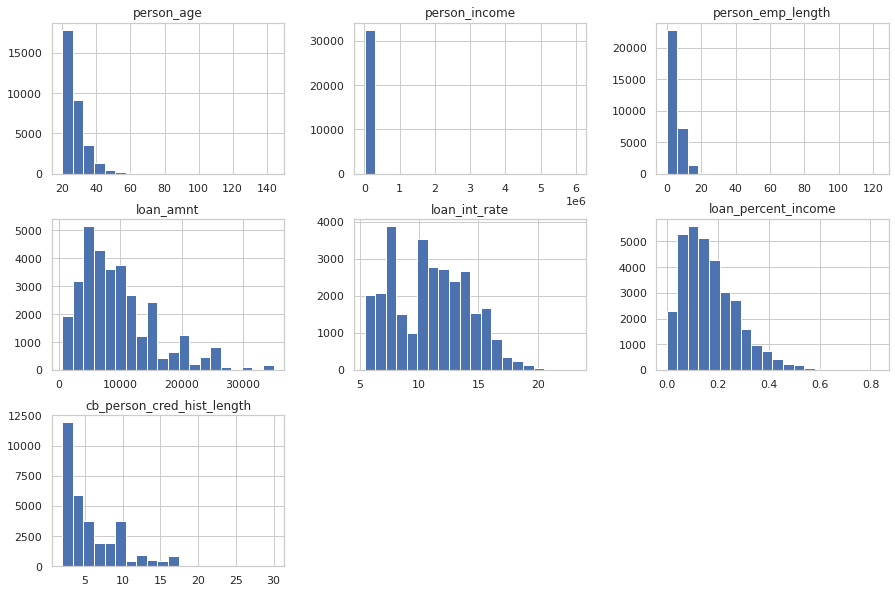

In [19]:
# Visualize numerical features on a histogram
credit[list(filter(lambda x: x != 'loan_status', credit_num_cols))].hist(bins=20, figsize=(15, 10))
plt.show()

<div class='alert alert-block alert-info'> <u>Note:</u>Features vary in scales that could affect the performance of the model, as well as most of their distribution is right-skewed</div>

<font color='green'>As noted above, most of the variables' distributions are **right-skewed** and on **different scales**. To handle this issue, **features will be scaled** at pre-processing</font>

In [20]:
# Generate correlation (Pearson's) matrix to gain more insight into the relationship between quantitative variables
# in the dataset 
corr_matrix = credit.corr()
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [21]:
# Inspect how the target variable correlates with other quantitative features in the dataset
corr_matrix['loan_status'].abs().sort_values(ascending=False)[1:]

loan_percent_income           0.379366
loan_int_rate                 0.335133
person_income                 0.144449
loan_amnt                     0.105376
person_emp_length             0.082489
person_age                    0.021629
cb_person_cred_hist_length    0.015529
Name: loan_status, dtype: float64

<font color='green'>The highest correlation with the target feature is among how the **loan amount compares to the person's income** as well as the **interest rate**</font>

[]

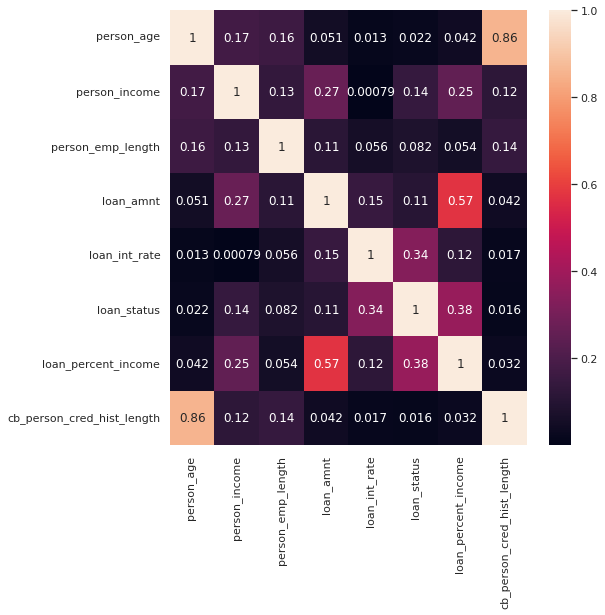

In [22]:
# Visualize the correlation matrix on a heatmap for better and easier interpretation of the relationships between
# each and every variable
ax = plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr_matrix.abs(), annot=True)
plt.plot()

<font color='green'>There are notable correlation between other quantiative variables:</font>
* credit history length and person's age - strong positive correlation (0.86) (older the person is the longer their credit history
* loan amount compared to income and loan amount - positive correlation (0.57) (the higher the loan amount, the larger proportion it will be of the person's income

### <font color='green'>Categorical Variables</font>

In [23]:
# Select only categorical variables from the DataFrame
credit_cat = credit.select_dtypes(include=['object'])
credit_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [24]:
# Get summary statistics for the categorical features representing (count, number of unique values, the mode and
# the frequency of the most common element)
credit_cat.describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


<font color='green'>The values of categorical variables are not too diverese (most 7 - loan_grade), people most frequently **Rent** their property, while their purpose for loan is **Education** with a loan grade of **A**</font>

In [25]:
# Save the column names for categorical features into a variable
credit_cat_cols = credit_cat.columns
credit_cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [26]:
# Poroportion of categorical columns in the data set
round(len(credit_cat_cols) / len(credit.columns) * 100, 1)

33.3

<font color='green'>1 / 3 of the variables in the dataset are **categorical**<font>

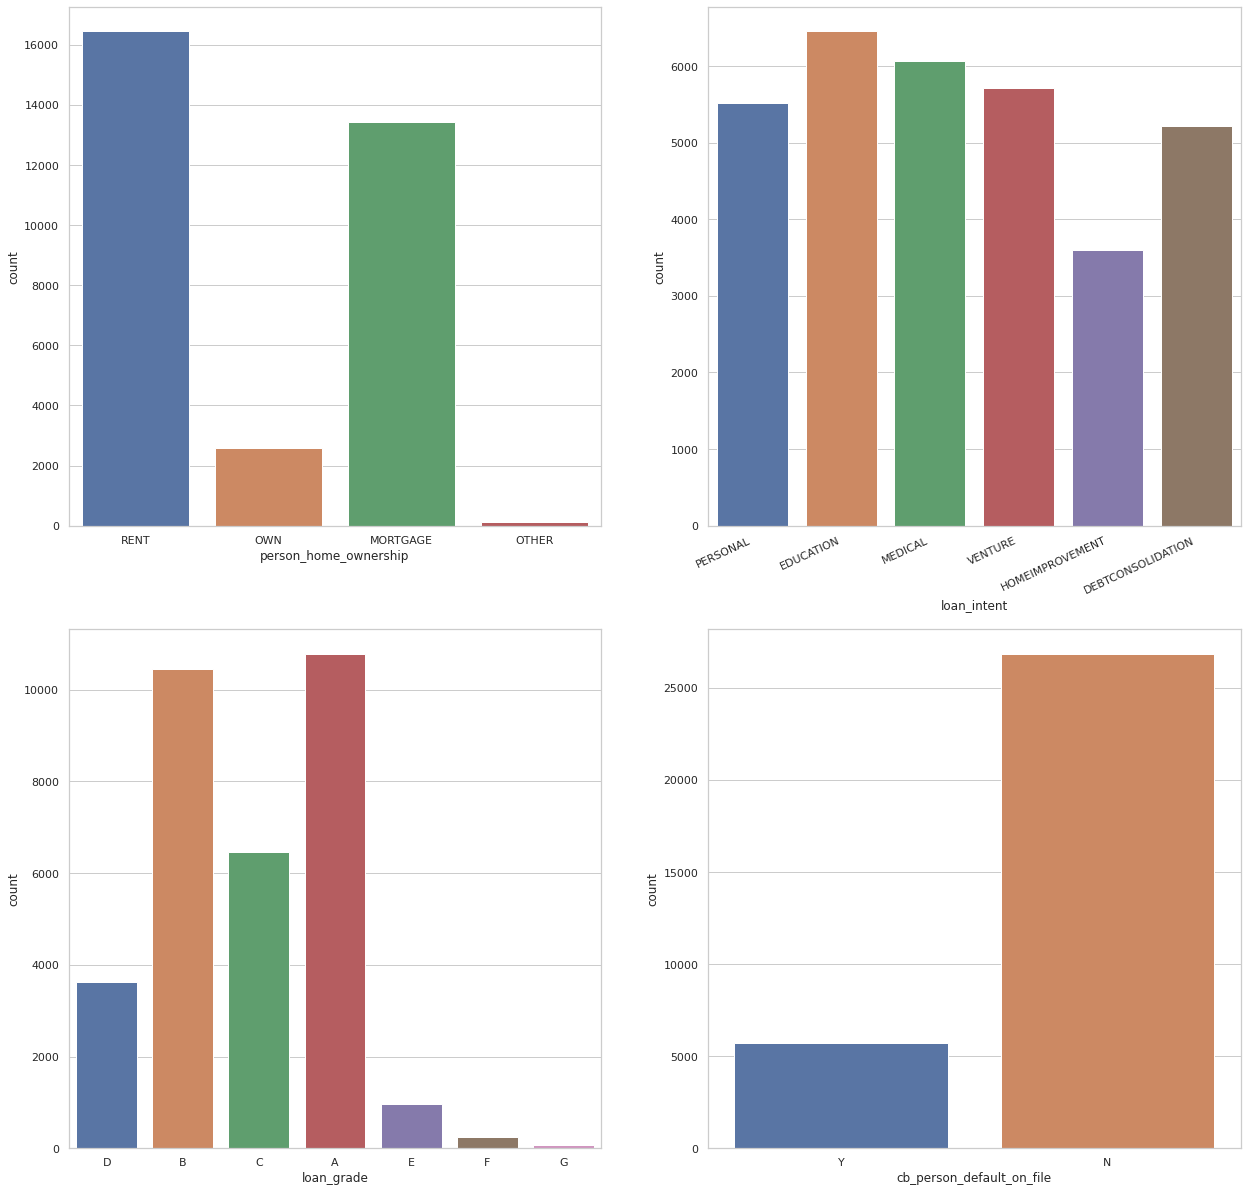

In [27]:
# Visualize the proportion of values for each categorical feature
def count_visualize_categorical(cat_cols, hue=None):
    plt.figure(figsize=(21, 21))
    # plt.tight_layout()
    for i in range(len(cat_cols)):
        ax = plt.subplot(2, 2, i + 1)
        ax = sns.countplot(data=credit_cat, x=credit_cat[cat_cols[i]], hue=hue)
        # To avoid overlapping labels for loan intent rotate labels to the right:
        if cat_cols[i] == 'loan_intent':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
            
count_visualize_categorical(credit_cat_cols)

<font color='green'>Distribution of categorical variables in the dataset:</font>
* Home ownership - people tend to rent their property or have a mortgage on it
* Loan intent - well-balanced, home improvement tends to be the less common reason for loan
* Loan grade - Loan grade is imbalanced in this dataset - Loan A and B are the most common
* Default on file - Binary variable - imbalanced where negative class is in the majority

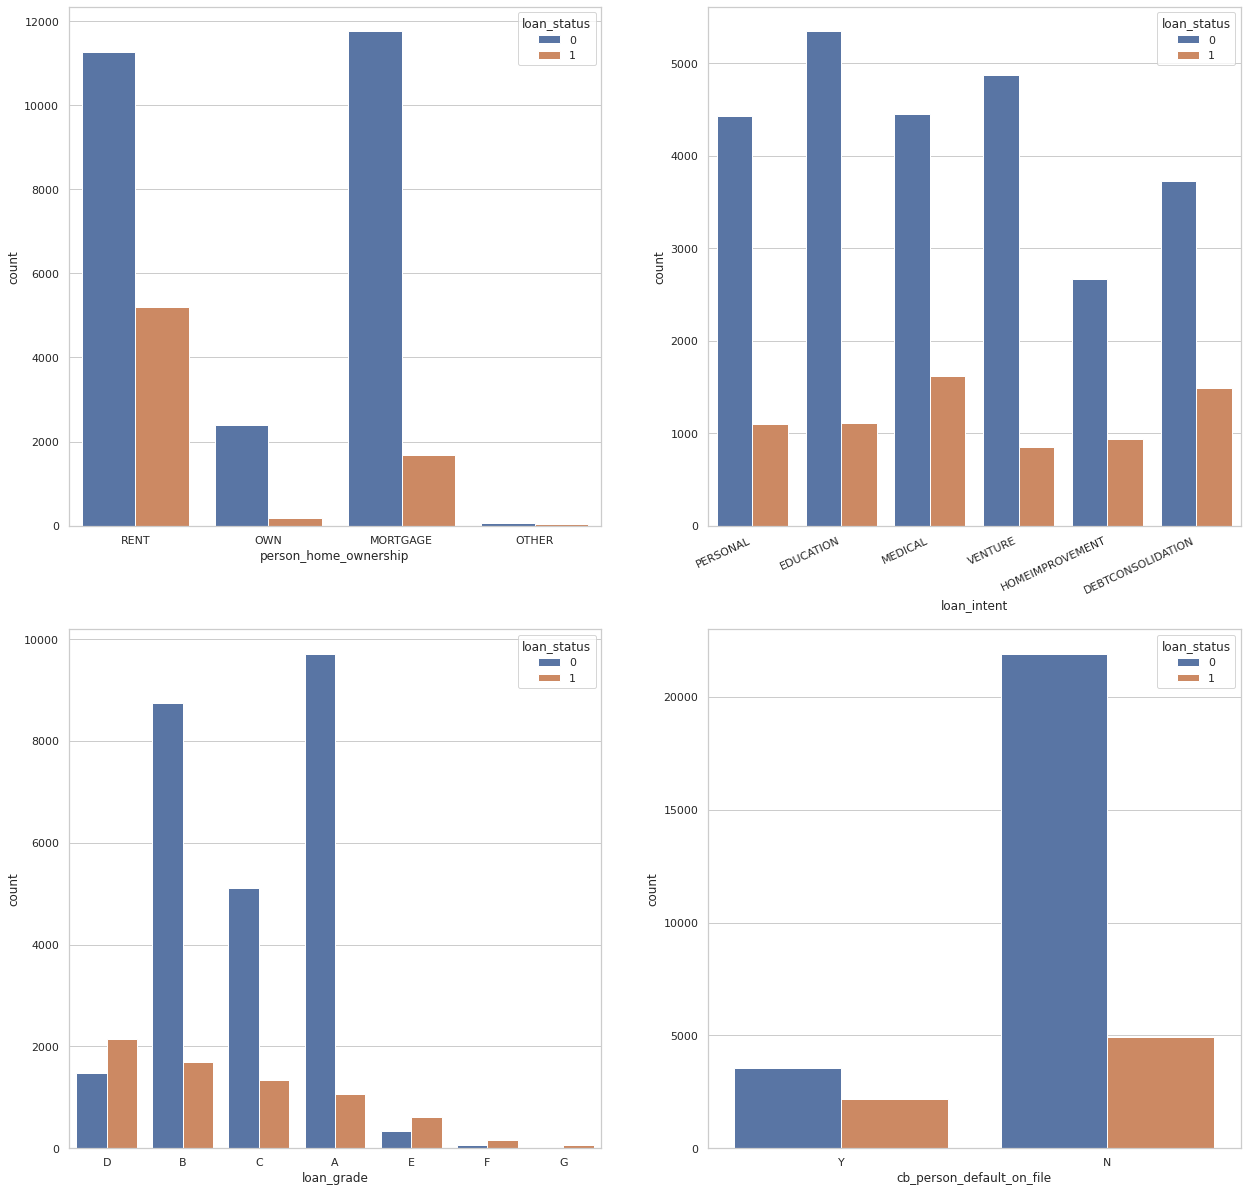

In [28]:
# Visualize the proportion of categorical values in terms of the target variable
"""plt.figure(figsize=(21, 21))
# plt.tight_layout()
for i in range(len(credit_cat_cols)):
    ax = plt.subplot(2, 2, i + 1)
    ax = sns.countplot(data=credit_cat, x=credit_cat[credit_cat_cols[i]], hue=credit['loan_status'])
    # To avoid overlapping labels for loan intent rotate labels to the right:
    if credit_cat_cols[i] == 'loan_intent':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')"""

# Call the visualize function and pass in the loan status as the parameter to do the counting
count_visualize_categorical(credit_cat_cols, credit['loan_status'])

<font color='green'>Key things to note about the distribution of categorical variables based on the target feature:</font>
* People who fail their re-payments tend to rent their property 
* They usually belong to a loan grade D - within this grade and the following grades (E,F,G) they tend to be in majority compared to people who are in the negative class

## Data Pre-processing

### <font color='green'>Handling Missing Values</font>

In [29]:
# Output the number of missing values where applicable along with the percentage of missing values compared to the 
# total number of values for the feature
credit_missing_cols = []  # Create a list to store columns with missing values
for col in columns:
    if (credit[col].isnull().sum() > 0):
        credit_missing_cols.append(col)  # Add the column name to the list
        print(f'Column name: {col}\nNumber of missing values: {credit[col].isnull().sum()}\nPercentage of missing values: {credit[col].isnull().sum() / len(credit) * 100}%\n')

Column name: person_emp_length
Number of missing values: 895
Percentage of missing values: 2.7469997851508547%

Column name: loan_int_rate
Number of missing values: 3116
Percentage of missing values: 9.563856235229121%



In [30]:
print(f'Columns with missing values: {credit_missing_cols}')

Columns with missing values: ['person_emp_length', 'loan_int_rate']


In [31]:
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [32]:
# Check how the features correlate with the target feature
corr_matrix['loan_status'].loc[['person_emp_length', 'loan_int_rate']]

person_emp_length   -0.082489
loan_int_rate        0.335133
Name: loan_status, dtype: float64

In [33]:
# Remove observations with missing employment length using the .dropna() function
credit.dropna(subset=['person_emp_length'], inplace=True)

<font color='green'>There was almost no correlation found between the length of employment and the target variable. Missing values in this variable contribute to 2.75% of total values, hence rows with missing values in the employment length column can be removed from the data set</font>

In [34]:
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [35]:
# The number of missing values for the employment length feature now is 0. As well the number of missing values for
# the interest rate has also decreased, meaning that there were observations who were missing both value.
# The interest rate feature is somewhat correlated with the target feature, however there are no apparent correlation
# between interest rate and other features, which means interest rate is specified using extraneous circumstances
# that are outside the scope of the dataset. Hence missing values for this feature will be filled with the most
# frequent value in the variable

# ! pip install scikit-learn
# from sklearn.impute import SimpleImputer

# Instantiate the SimpleImputer object
imp_most_frequent = SimpleImputer(strategy='most_frequent')

# Fit and transform the loan_int_rate variable
credit['loan_int_rate'] = imp_most_frequent.fit_transform(credit['loan_int_rate'].values.reshape(-1, 1))


<font color='green'>The interest rate is somewhat correlated (0.335) with the target variable, but does not correlate to other features. This could be due to interest rates being set based on extraneous circumstances, hence to avoid having to drop observations, missing values for this column are filled in with the mode of the column using a SimpleImputer</font>

In [36]:
# Check if any missing values still remain in the dataset
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<font color='green'>***All missing values in the dataset have been handled!***</font>

### <font color='green'>Handling Outliers</font>

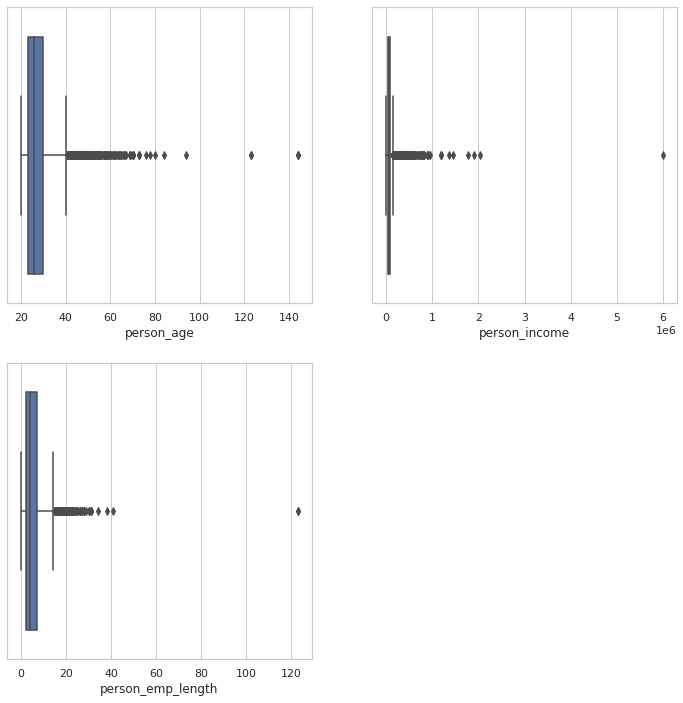

In [37]:
# To enhance the accuracy of the predictive model, outliers in the dataset must be handled first
# Visualize the three input features with potential outliers
cols = ['person_age', 'person_income', 'person_emp_length']

def visualize_outliers(cols):
    fig = plt.figure(figsize=(12, 12))
    for i in range(0, len(cols)):
        ax = fig.add_subplot(2, 2, i+1)
        ax = sns.boxplot(x=credit[cols[i]])

visualize_outliers(cols)

<font color='green'>The boxplots above show that all three columns have some large outliers which could be the result of a mistake when inputting data, such as person age >140 years</font>

In [38]:
def cal_upper_limit(feature):
    # Method to calculate the maximum values at the whiskers (Q3 + (1.5 * IQR))
    IQR = credit[feature].quantile(0.75) - credit[feature].quantile(0.25) # Inter Quantile Range
    return credit[feature].quantile(0.75) + (1.5 * IQR)

# Calculate the upper limit for all columns
limit_dict = {col:cal_upper_limit(col) for col in cols}

# Remove values from the dataset that are above the upper limit
for col, limit in limit_dict.items():
    credit = credit[(credit[col] < limit)]

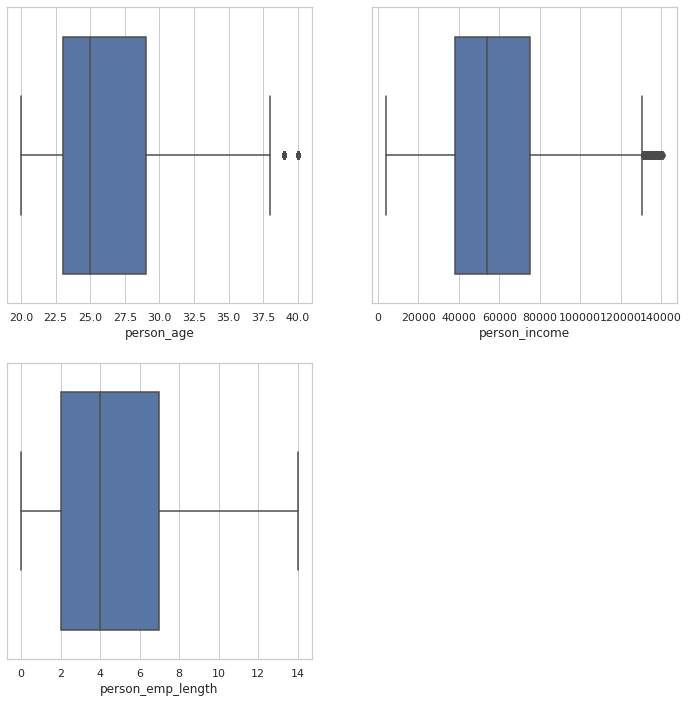

In [39]:
"""fig = plt.figure(figsize=(12, 12))
for i in range(0, len(cols)):
    ax = fig.add_subplot(2, 2, i+1)
    ax = sns.boxplot(x=credit[cols[i]])"""
# Create the boxplots after removing the outliers
visualize_outliers(cols)

<font color='green'>***Outliers for these columns are handled by dropping values located outside the upper whisker of the boxplot. This results in more maintanable and less noisy data in these columns.***</font>

### <font color='green'>Encoding Categorical Variables</font>

In [40]:
# 1/3 of the features in the dataset are categorical hence these must be transformed into integers prior fitting the
# data on the model
# It can be assumed that the loan_grade feature is ordinal, meaning that the categorical values have an order and
# range from best to worst (from A to G).
# OrdinalEncoder from the Scikit-Learn library can be used to encode this feature while also maintaining the order of
# it's values
# from sklearn.preprocessing import OrdinalEncoder

# Instantiate the encoder, passing in the category values
ordinal_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])

loan_grade_reshaped = credit['loan_grade'].values.reshape(-1, 1)  # reshape the feature into a 2-D np array

# Fit the array to the scaler and transform the feature in the DataFrame
credit['loan_grade'] = ordinal_encoder.fit_transform(loan_grade_reshaped)


<font color='green'>**Loan grade**: Assuming that the values in this column follow an order, using OrdinalEncoder from the sklearn preprocessing module, values are transformed to numerical while maintaining the order</font>

In [41]:
# The 'cb_person_default_on_file' feature values are already in binary True or False represented as Y or N
# Using the .replace() function, string values can be converted into integers (1 or 0)
credit['cb_person_default_on_file'].replace(['Y', 'N'], [1, 0], inplace=True)

<font color='green'>**Default on file**: This is a binary variable, hence 'Y' and 'N' values can be updated to corresponding 1s and 0s using Pandas' .replace() method</font>

In [42]:
# For handling the rest of the categorical features, One-Hot-Encoding (OHE) is used to create a dummy variable 
# for each values in the variable
# OHE can be argued as not space efficient, if there are features with a wide variety of values, BinaryEncoder 
# could be used to reduce the sparse matrix, by converting each category to its binary representation

# Using the Pandas' .get_dummies() function to create dummy variables
ohe = pd.get_dummies(credit[['person_home_ownership', 'loan_intent']])

credit = pd.concat([credit, ohe], axis=1)  # Concatenate the dummy DataFrame with the original DataFrame

# Drop the original categorical columns
credit.drop(columns=['person_home_ownership', 'loan_intent'], inplace=True)

<font color='green'>**Home ownership** and **Loan intent**: These variables can be encoded using OHE. OHE essentially is not efficient in terms of space, however in case of this dataset, the number of unique values in these columns are relatively small</font>

In [43]:
# Visualize the new credit DataFrame
credit.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1.0,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,2.0,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,2.0,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,2.0,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,0.0,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1


In [44]:
# Call .info() to check the updated dtypes
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28259 entries, 1 to 32296
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      28259 non-null  int64  
 1   person_income                   28259 non-null  int64  
 2   person_emp_length               28259 non-null  float64
 3   loan_grade                      28259 non-null  float64
 4   loan_amnt                       28259 non-null  int64  
 5   loan_int_rate                   28259 non-null  float64
 6   loan_status                     28259 non-null  int64  
 7   loan_percent_income             28259 non-null  float64
 8   cb_person_default_on_file       28259 non-null  int64  
 9   cb_person_cred_hist_length      28259 non-null  int64  
 10  person_home_ownership_MORTGAGE  28259 non-null  uint8  
 11  person_home_ownership_OTHER     28259 non-null  uint8  
 12  person_home_ownership_OWN       

<font color='green'>***All variables in the dataset are of numerical type!***</font>

### <font color='green'>Feature Scaling</font>

In [45]:
# As it was shown above, numerical feature values are on different scales as well as they do not follow normal
# distribution. 
# To attend this issue, data will be normalized using a MinMaxScaler() to scale values between 0 and 1
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Create a new scaler object
# Select features to scale - loan_status is the target variable, loan_percent_income is already on scale
num_cols_to_scale = [col for col in credit_num_cols if col not in ['loan_status', 'loan_percent_income']]

credit[num_cols_to_scale] = scaler.fit_transform(credit[num_cols_to_scale])  # Fit the data to the scaler

credit[num_cols_to_scale].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,28259.000000,28259.000000,28259.000000,28259.000000,28259.000000,28259.000000
mean,0.327968,0.400369,0.312790,0.255701,0.315215,0.211494
std,0.219663,0.199800,0.242064,0.174576,0.171967,0.216640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.247917,0.142857,0.130435,0.172472,0.066667
50%,0.250000,0.364859,0.285714,0.217391,0.312921,0.133333
75%,0.450000,0.518345,0.500000,0.333333,0.434831,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color='green'>As it was identified during data exploration, numerical variables in the dataset are on a different scale. This problem can be handled using a MinMaxScaler which essentially scales all numerical features to the same range - in this case between 0 and 1 where 0 is the minimum value and 1 is the maximum for the given variable </font>

<font color='green'>***Following applying a MinMaxScaler, all all numerical features are on the same scale!***</font>

### <font color='green'>Training and Validation Sets</font>

In [46]:
# Save the input features into a variable (X)
X = credit.drop('loan_status', axis=1)

In [47]:
# Save the target variable into a variable (y)
y = credit['loan_status']

In [48]:
# Split the dataset into Training and Testing sets using the train_test_split() function from sklearn's
# model_selection library
# from sklearn.model_selection import train_test_split # import the module

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [49]:
# Check the class distribution in the training set after the split
y_train.value_counts(normalize=True)

0    0.776972
1    0.223028
Name: loan_status, dtype: float64

In [50]:
# Check the class distribution in the validation set after the split
y_test.value_counts(normalize=True)

0    0.780786
1    0.219214
Name: loan_status, dtype: float64

## Building the Classification Model

_The aim of the project is to predict that an instance belongs to a particular class, and therefore it is a classification problem._ (Since the problem involves only two labels, it is a binary classification)

The first model that will be built and evaluated for this purpose is a **Logistic Regression Model**.

### <font color='green'>Logistic Regression Model</font>

#### Building and Training the Model

In [51]:
# Import the LogisticRegression class and instantiate the model
# from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(class_weight='balanced')
# Set class_weight parameter to adjust class weights inversely proportional to class distribution

In [52]:
# Train the model using the Training set of features and labels
lg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [53]:
# Use the model to make predictions on unseen data (X_test) and save it to a variable
y_pred = lg_model.predict(X_test)
# y_pred  # Array of binary 1s and 0s

#### Logistic Regression Model Evaluation

In [54]:
# Create a Confusion Matrix to evaluate the accuracy of the model
# The Confusion Matrix returns a 2D array containing the results from comparing predicted values to the actual
# values representing True Negatives, False Positives, False Negatives and True Positives
# from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred=y_pred, y_true=y_test)
# In terms of predicting instances with class label of 0, the model was fairly accurate, however in terms of
# positive classes almost half of the predictions were False Positive

array([[3478,  935],
       [ 266,  973]])

In [55]:
# To define a score for the model's accuracy based on the Confusion Matrix, the accuracy_score() function can be 
# used. The model's accuracy can be calculated by dividing the number of correctly classified predictions by the 
# total number of predictions
# from sklearn.metrics import accuracy_score
print(f'Accuracy score for Logistic Regression model: {accuracy_score(y_test, y_pred)}.')
# The predictions of the model were correct 78.75% of time

Accuracy score for Logistic Regression model: 0.7875088464260439.


In [56]:
# Check the sensitivity (Recall) of the model - the ratio of positive classes correctly predictied by the 
# classifier
# from sklearn.metrics import recall_score
print(f'The sensitivity of the Logistic Regression model: {recall_score(y_test, y_pred)}.')

The sensitivity of the Logistic Regression model: 0.7853107344632768.


In [57]:
# Check how accurately the model can predict positive predictions by calculating the model's precision
# from sklearn.metrics import precision_score
print(f'The precision of the Logistic Regression model: {precision_score(y_test, y_pred)}')
# As shown in the confusion matrix the model is not very accurate when it comes to predicting positive classes, 
# almost the half of the predictions were incorrect

The precision of the Logistic Regression model: 0.509958071278826


In [58]:
# Finally the F1-Score can be used to describe the effectivness (harmonic mean) of the model by combining the
# precision and recall scores
# from sklearn.metrics import f1_score
print(f'The F1-Score of the Logistic Regression model: {f1_score(y_test, y_pred)}')

The F1-Score of the Logistic Regression model: 0.6183666984429615


The evaluation scores show that the model does well on predicting instances with a target variable of 0 while performs rather poorly on predicting positive classes. This can be due to the class imbalance that was identified during the data exploration phase. 

In [59]:
# The Receiver Operating Characteristic (ROC) curve of the model
# The ROC curve can be used to plot the TP rate of the model against the FP rate. 
# from sklearn.metrics import roc_curve

# Get the FP and TP rates for various threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

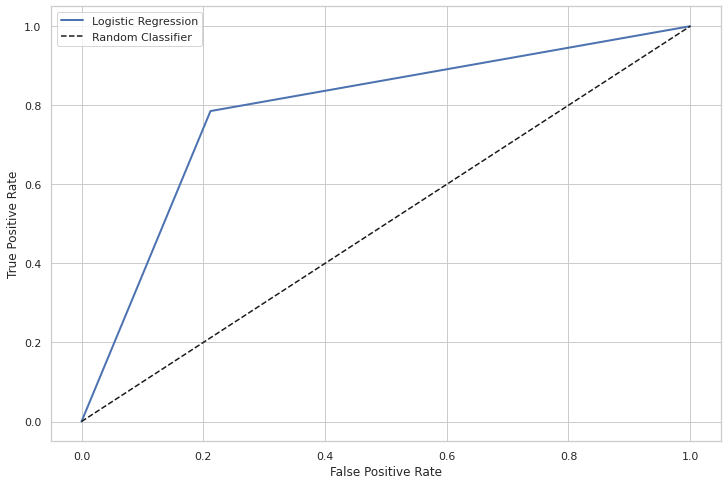

In [60]:
# Plot the ROC curve
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [61]:
# Calculate the Area Under the Curve (AUC) score for the Logistic Regression classifier
# from sklearn.metrics import roc_auc_score

print(f'AUC score for the model: {roc_auc_score(y_test, y_pred)}.')
# The larger the area under the curve the better the predictive power of the classifier.
# The model is underperforming since the corner of the curve is far away from the top left-corner, this also results
# in an AUC score shown below

AUC score for the model: 0.7867183629261773.


#### Change Dataset Partitioning to Imporve Logistic Regression Classifier

To try to achieve a higher model accuracy for the Logistic Regression Classifier, the model will be trained and evaluated on different training and validation sets, where sets ratio is more balanced to counter class imbalance in the original dataset 

In [62]:
# Split the dataset into training (size=.6) and validation sets (size=.4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.6, random_state=42)

In [63]:
# Build and train the new model
lg_model2 = LogisticRegression(class_weight='balanced')
lg_model2.fit(X_train2, y_train2)

LogisticRegression(class_weight='balanced')

In [64]:
y_pred = lg_model2.predict(X_test2)

In [65]:
# Check the new model's predictive power with AUC score
print(f'AUC score for second model: {roc_auc_score(y_test2, y_pred)}.')

AUC score for second model: 0.7884114169956534.


Changing the ratio of size for training and validation sets have resulted in a slight increase in predictive power of the model 

#### Synthetic Minority Oversampling to Overcome Class Imbalance

In [111]:
# %pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)
X_oversample, y_oversample = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=42)

lg_model = LogisticRegression(class_weight='balanced', max_iter=2000)

lg_model.fit(X_train, y_train)

lg_model_pred = lg_model.predict(X_test)

roc_auc_score(y_test, lg_model_pred)

0.7913715812109123

### <font color='green'>Create and Evaluate Different Classifiers</font>

To improve the solution for this binary classification, in this section the data used to train the Logistic Regression model will be used to train several different kind of models. Then, the accuracy along with the predictive power of each model will be evaluated to find to find the most powerful classifier.

Models used:
> * KNN
> * DecisionTree
> * RandomForest

#### Building and Training the Models

In [67]:
# Import relevant libraries
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# Instantiate each classifier
classifiers = [
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=500, random_state=42)
]

In [103]:
def train_and_predict(classifiers):
    models_and_predictions = {}
    for classifier in classifiers:
        model = classifier.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        models_and_predictions[model] = y_pred
    return models_and_predictions

models_and_predictions = train_and_predict(classifiers)

#### Evaluating Models' Performance

In [104]:
# Check each model's accuracy score
def check_accuracy(models_and_predictions):
    accuracy = pd.DataFrame(columns=['Classifier', 'Accuracy Score'])
    for model, pred in models_and_predictions.items():
        accuracy = accuracy.append({
            'Classifier': model.__class__.__name__,
            'Accuracy Score': accuracy_score(y_test, pred)
        }, ignore_index=True)
    accuracy.set_index('Classifier', inplace=True)
    return accuracy

accuracy = check_accuracy(models_and_predictions)
accuracy

,Accuracy Score
Classifier,
KNeighborsClassifier,0.892175
DecisionTreeClassifier,0.890924
RandomForestClassifier,0.943244


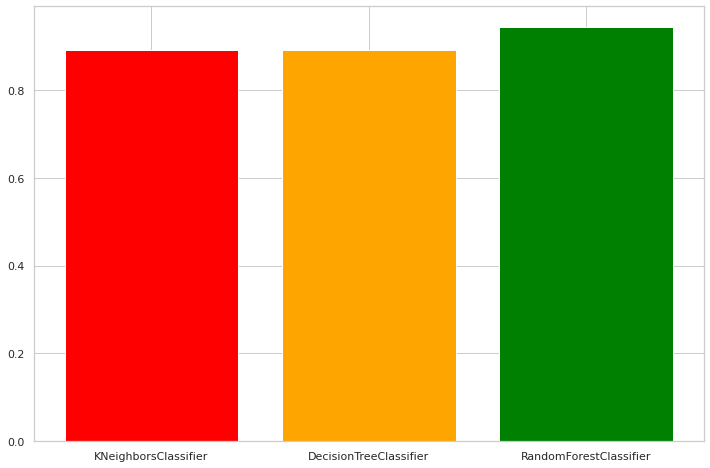

In [105]:
# Visualize accuracy score for each classifier
fig = plt.figure(figsize=(12, 8))
plt.bar(accuracy.index, accuracy['Accuracy Score'], color=['Red', 'Orange', 'Green'])
plt.show()

In [106]:
# Get FP and TP rates as well as AUC score for each model
def get_roc_results(models_and_predictions):
    roc_results = pd.DataFrame(columns=['Classifier', 'fpr', 'tpr', 'auc'])
    for model, pred in models_and_predictions.items():
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        auc = roc_auc_score(y_test, pred)
        roc_results = roc_results.append({
            'Classifier': model.__class__.__name__,
            'fpr': fpr,
            'tpr': tpr,
            'auc': auc
        }, ignore_index=True)
    roc_results.set_index('Classifier', inplace=True)
    return roc_results

roc_results = get_roc_results(models_and_predictions)
roc_results

,fpr,tpr,auc
Classifier,,,
KNeighborsClassifier,"[0.0, 0.17583408476104598, 1.0]","[0.0, 0.9614325068870524, 1.0]",0.892799
DecisionTreeClassifier,"[0.0, 0.1178990081154193, 1.0]","[0.0, 0.8999081726354453, 1.0]",0.891005
RandomForestClassifier,"[0.0, 0.021415689810640216, 1.0]","[0.0, 0.9072543617998163, 1.0]",0.942919


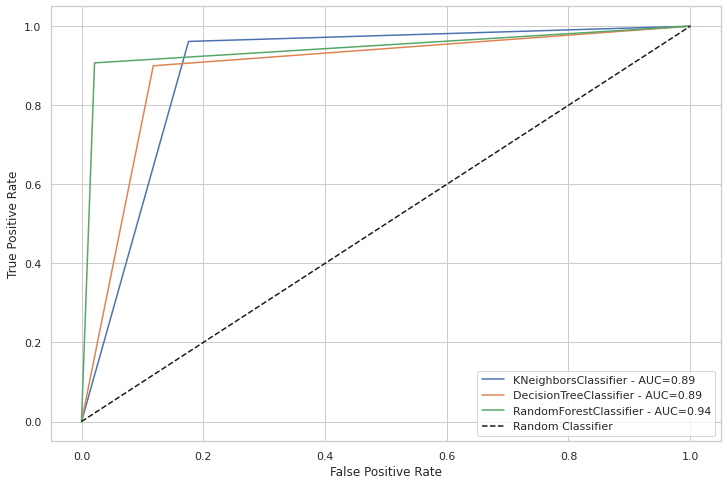

In [107]:
# Visualize the predictive power of each model on a ROC curve
def plot_roc_curve(roc_results):
    fig = plt.figure(figsize=(12, 8))
    for i in roc_results.index:
        auc = roc_results.loc[i]['auc']
        plt.plot(roc_results.loc[i]['fpr'], roc_results.loc[i]['tpr'],
                 label=f'{i} - AUC={round(auc, 2)}')
        
        # Plot the random classifier
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        
        # Set plot variables
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

plot_roc_curve(roc_results)

#### Hyperparameter Tuning for RandomForestClassifier

In [115]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Create the hyperparameter grid for the max_features parameter
param_grid = {'max_features': np.arange(start=4, stop=8)}

rf_model = RandomForestClassifier(n_estimators=500)
rf_model_cv = GridSearchCV(rf_model, param_grid, scoring='accuracy')
rf_model_cv.fit(X_train, y_train)

rf_model_cv.best_score_
rf_model_cv.cv_results_

{'mean_fit_time': array([15.58342848, 17.33564787, 19.84222431, 22.32388959]),
 'std_fit_time': array([1.0841107 , 0.67390376, 1.42993789, 1.39322236]),
 'mean_score_time': array([0.67160287, 0.62091975, 0.59460602, 0.59546947]),
 'std_score_time': array([0.08103445, 0.05641191, 0.04766653, 0.06131094]),
 'param_max_features': masked_array(data=[4, 5, 6, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 4},
  {'max_features': 5},
  {'max_features': 6},
  {'max_features': 7}],
 'split0_test_score': array([0.94284089, 0.94241433, 0.94312527, 0.94184559]),
 'split1_test_score': array([0.93246125, 0.9341675 , 0.93331438, 0.93374094]),
 'split2_test_score': array([0.93928622, 0.93928622, 0.93814873, 0.93644249]),
 'split3_test_score': array([0.93558936, 0.93601592, 0.93573155, 0.93672686]),
 'split4_test_score': array([0.94098407, 0.94254835, 0.94041524, 0.94084187]),
 'mean_test_score': array([0.93823236, 0

In [ ]:
# TODO: Move SMOTE to the end, calculate ROC 